<a href="https://colab.research.google.com/github/Harman1107/Major_Project_Parkinson/blob/DevHarman/Models_of_Major_Project_using_Dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn import svm
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('./eeg_dataset(2).csv')

In [3]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Status
0,-0.018572,-0.016547,-0.012220,-0.026548,-0.015249,-0.012315,-0.005031,-0.014535,-0.012051,-0.009093,...,-0.011194,-0.01085,-0.009106,-0.014477,-0.010789,-0.008840,-0.010232,-0.007059,-0.009808,0
1,-0.015544,-0.007960,-0.009142,-0.004414,0.002998,-0.005721,-0.001822,0.005940,-0.007404,0.002348,...,-0.001600,0.00008,-0.002471,-0.003974,-0.014098,-0.005188,-0.014829,-0.000739,-0.002891,0
2,-0.013005,-0.014493,-0.005920,-0.007964,-0.004377,-0.002638,-0.010482,-0.003170,-0.000205,-0.001762,...,-0.008962,-0.00519,-0.004611,-0.013489,-0.006619,-0.014944,-0.010761,-0.004509,0.004039,1
3,-0.009478,-0.013750,-0.005022,-0.013594,-0.005313,-0.007160,-0.002833,-0.003069,-0.001594,0.001301,...,-0.002374,-0.00158,-0.007699,-0.011463,-0.005926,-0.008118,-0.002620,-0.007471,-0.003515,0
4,-0.002619,-0.006864,-0.006059,-0.013748,-0.001356,-0.009366,-0.009207,0.001396,-0.001500,-0.002128,...,-0.004904,-0.00636,-0.004691,-0.008551,-0.005941,-0.002934,0.007832,0.000120,-0.004394,1


In [4]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(31, 33)

In [5]:
for column in parkinsons_data.columns:
    if parkinsons_data[column].dtype == 'object':
        parkinsons_data = parkinsons_data.drop(column, axis=1)

In [6]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fp1     31 non-null     float64
 1   AF3     31 non-null     float64
 2   F7      31 non-null     float64
 3   F3      31 non-null     float64
 4   FC1     31 non-null     float64
 5   FC5     31 non-null     float64
 6   T7      31 non-null     float64
 7   C3      31 non-null     float64
 8   CP1     31 non-null     float64
 9   CP5     31 non-null     float64
 10  P7      31 non-null     float64
 11  P3      31 non-null     float64
 12  Pz      31 non-null     float64
 13  PO3     31 non-null     float64
 14  O1      31 non-null     float64
 15  Oz      31 non-null     float64
 16  O2      31 non-null     float64
 17  PO4     31 non-null     float64
 18  P4      31 non-null     float64
 19  P8      31 non-null     float64
 20  CP6     31 non-null     float64
 21  CP2     31 non-null     float64
 22  C4  

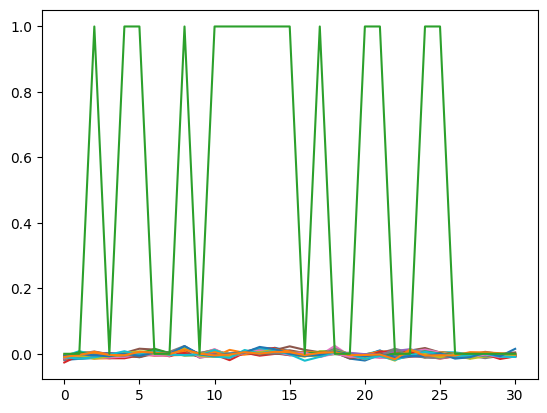

In [7]:
plt.plot(parkinsons_data)
plt.show()
    

In [8]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

Fp1       0
AF3       0
F7        0
F3        0
FC1       0
FC5       0
T7        0
C3        0
CP1       0
CP5       0
P7        0
P3        0
Pz        0
PO3       0
O1        0
Oz        0
O2        0
PO4       0
P4        0
P8        0
CP6       0
CP2       0
C4        0
T8        0
FC6       0
FC2       0
F4        0
F8        0
AF4       0
Fp2       0
Fz        0
Cz        0
Status    0
dtype: int64

In [9]:
# getting some statistical measures about the data
parkinsons_data.describe()

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Status
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,-0.004972,-0.003752,-0.002855,-0.003112,-0.001860,-0.002367,-0.001743,0.000777,-0.000098,0.000423,...,-0.003956,-0.000573,-0.003004,-0.005555,-0.002910,-0.002747,-0.004318,-0.000653,-0.000057,0.483871
std,0.008525,0.008086,0.007269,0.009014,0.006272,0.006635,0.006895,0.006835,0.005694,0.005803,...,0.006210,0.007083,0.006375,0.007420,0.007966,0.008597,0.008142,0.009012,0.006144,0.508001
min,-0.020594,-0.016670,-0.013366,-0.026548,-0.015249,-0.014222,-0.012017,-0.014535,-0.012051,-0.014933,...,-0.019470,-0.012326,-0.015042,-0.014477,-0.014098,-0.020858,-0.021175,-0.014712,-0.016635,0.000000
25%,-0.009959,-0.009553,-0.007550,-0.007763,-0.005167,-0.007148,-0.005121,-0.003119,-0.003186,-0.002127,...,-0.007644,-0.005809,-0.007507,-0.010382,-0.007291,-0.007765,-0.009516,-0.007021,-0.004137,0.000000
50%,-0.004315,-0.004331,-0.004093,-0.004414,-0.002649,-0.002654,-0.002432,0.001060,-0.000205,0.000732,...,-0.004904,-0.001568,-0.004175,-0.007997,-0.005895,-0.002934,-0.003664,-0.001961,-0.000799,0.000000
75%,-0.000590,0.001483,0.001318,0.001623,0.000619,0.002300,-0.000783,0.004567,0.003832,0.003813,...,-0.001164,0.003117,0.000959,-0.002652,0.000653,0.000853,-0.000059,0.002029,0.004483,1.000000
max,0.018389,0.016121,0.021652,0.017025,0.021726,0.010559,0.024101,0.023857,0.012009,0.011203,...,0.007445,0.018850,0.013796,0.017983,0.018864,0.018009,0.011572,0.023451,0.012831,1.000000


In [11]:
# distribution of target Variable
parkinsons_data['Status'].value_counts()

0    16
1    15
Name: Status, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


In [13]:
# grouping the data based on the target variable
parkinsons_data.groupby('Status').mean()

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
Status,,,,,,,,,,,,,,,,,,,,,
0,-0.005955,-0.005123,-0.005736,-0.004614,-0.003512,-0.005481,-0.001564,-0.001627,-0.001469,-0.001782,...,-0.001655,-0.003686,-0.000675,-0.003893,-0.006928,-0.002722,-0.003137,-0.006118,-0.002954,-0.001036
1,-0.003923,-0.002290,0.000217,-0.001511,-0.000097,0.000954,-0.001934,0.003343,0.001364,0.002774,...,0.000070,-0.004244,-0.000465,-0.002055,-0.004090,-0.003111,-0.002332,-0.002398,0.001801,0.000986


Data Pre-Processing

Separating the features & Target

In [15]:
X = parkinsons_data.drop(columns=['Status'], axis=1)
Y = parkinsons_data['Status']

In [ ]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [16]:
print(Y)

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     0
8     1
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    0
17    1
18    0
19    0
20    1
21    1
22    0
23    0
24    1
25    1
26    0
27    0
28    0
29    0
30    0
Name: Status, dtype: int64


Splitting the data to training data & Test data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(31, 32) (24, 32) (7, 32)


Data Standardization

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(X_train)

StandardScaler()

In [21]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [22]:
print(X_train)

[[-1.88627413e+00 -1.72233723e+00 -8.49201240e-01 -9.22970395e-01
  -9.28836235e-01 -8.95501830e-01 -1.37022841e+00 -5.22258509e-01
  -1.12573975e+00 -3.70004192e-01 -1.00997791e+00 -5.91273786e-01
  -6.04801387e-01 -5.31811081e-01 -7.01365050e-01 -1.20826708e+00
  -1.29385101e+00 -1.96595361e+00 -1.28608462e+00 -1.10008258e+00
  -1.12009485e-01 -8.38416413e-01 -4.28865921e-01 -1.06406871e+00
  -8.23447681e-02 -1.64635125e+00 -3.41059825e-01 -9.45045256e-01
  -1.29711926e+00 -1.67563295e+00 -8.43752725e-01 -7.27577562e-01]
 [ 6.32484244e-01  6.50080825e-01  1.35685285e-01  4.85627135e-01
   2.11090246e-01  5.72856250e-01 -1.03736150e-01 -9.50445097e-02
   2.41720634e-01 -1.08452919e+00  3.22779265e-01 -3.61617423e-01
  -1.24445099e+00 -1.10724606e+00 -1.03071997e+00 -8.75671065e-01
  -1.91719180e-01 -1.81245190e+00 -1.20279030e+00 -4.99745355e-01
  -7.17667354e-01  6.36360268e-01  4.96066213e-01  3.19892955e-01
  -2.48727889e-01  1.30689182e+00  4.12350927e-01  3.97426012e-01
   6.2668

Model Training

Support Vector Machine Model Using Different Kernel Values and Confusion Matrix

Accuracy score of training data using Kernel Value :-  linear  :  1.0 



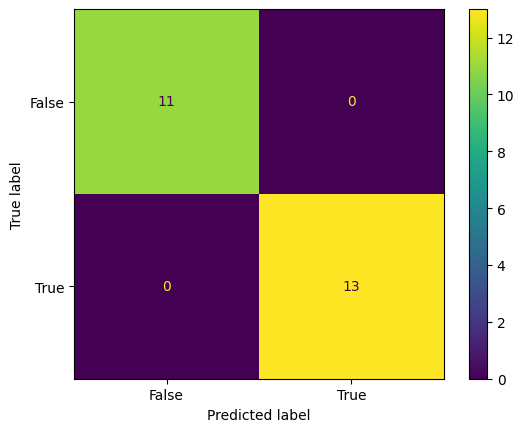

Accuracy score of training data using Kernel Value :-  poly  :  0.7916666666666666 



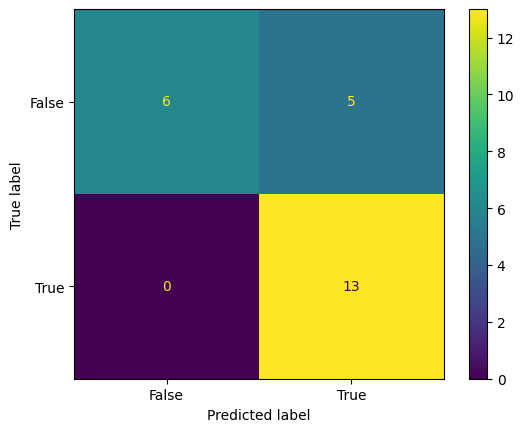

Accuracy score of training data using Kernel Value :-  rbf  :  1.0 



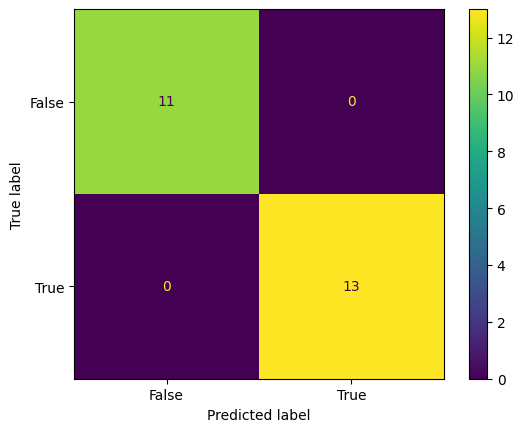

Accuracy score of training data using Kernel Value :-  sigmoid  :  0.75 



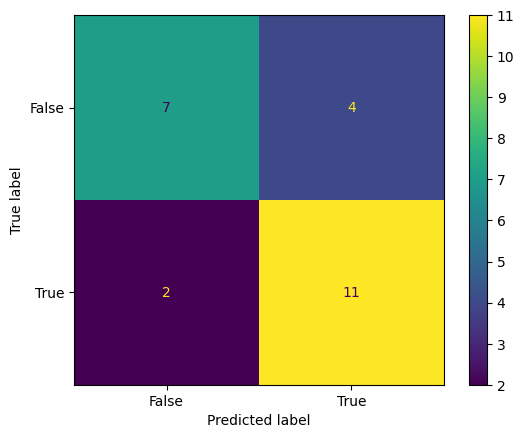

Accuracy score of training data using RF is :-  1.0
Accuracy score of training data using GNB is :-  0.7083333333333334
Accuracy score of training data using XGB is :-  0.75


In [23]:
kernelValues = ['linear', 'poly','rbf', 'sigmoid']
model_RF = RandomForestClassifier(n_estimators = 100, random_state=1)
model_GNB = GaussianNB()
model_XGB = xgb.XGBClassifier()
for v in kernelValues:
    model = svm.SVC(kernel=v)
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    confusion_matrix =  metrics.confusion_matrix(Y_train, X_train_prediction)
    print('Accuracy score of training data using Kernel Value :- ', v," : ", training_data_accuracy,"\n")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    # sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='gist_heat', cbar=True)
    cm_display.plot()
    plt.show()

model_RF.fit(X_train,Y_train)
model_GNB.fit(X_train, Y_train)
model_XGB.fit(X_train, Y_train)
x_pred_xgb = model.predict(X_train)
x_pred_rf = model_RF.predict(X_train)
x_pred_gnb = model_GNB.predict(X_train)
accuracy_rf = accuracy_score(Y_train, x_pred_rf)
accuracy_gnb = accuracy_score(Y_train, x_pred_gnb)
accuracy_xgb = accuracy_score(Y_train, x_pred_xgb)
print('Accuracy score of training data using RF is :- ', accuracy_rf )
print('Accuracy score of training data using GNB is :- ', accuracy_gnb )
print('Accuracy score of training data using XGB is :- ', accuracy_xgb )



In [ ]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='sigmoid')

Model Evaluation

Accuracy Score

In [ ]:
# accuracy score on training data
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
confusion_matrix =  metrics.confusion_matrix(Y_train, X_train_prediction)

Accuracy score of training data :  0.8525641025641025


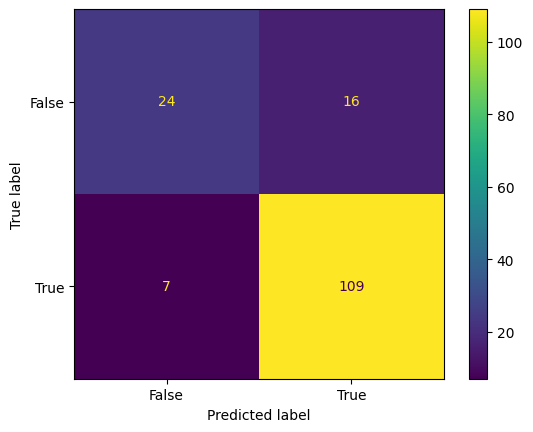

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
# accuracy score on training data

Accuracy score of test data :  0.8717948717948718


Building a Predictive System

In [ ]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = modelLinear.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


c:\Users\alech\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
